In [1]:
## Financial Planner

In [1]:
# Initial imports
import datetime as dt
import pytz
import numpy as np
import pandas as pd
import os
import requests
#from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import alpaca_trade_api as tradeapi
from alpacakeys import *
%matplotlib inline

In [2]:
# Create two variables called my_btc and my_eth
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [4]:
import requests

In [63]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18964862,
            "total_supply": 18964862,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 37255.0,
                    "volume_24h": 25227081908,
                    "market_cap": 707147444413,
                    "percentage_change_1h": -0.0537626983101828,
                    "percentage_change_24h": -4.5902152920652,
                    "percentage_change_7d": -12.6175242694789,
                    "percent_change_1h": -0.0537626983101828,
                    "percent_change_24h": -4.5902152920652,
                    "percent_change_7d": -12.6175242694789
                },
                "CAD": {
                    "price": 47507.576,
                    "volume_24h": 32169574849.0816,
                  

In [52]:
# create dataframe with the current amount of crypto assets
# set current amount of crypto assets
crypto_data = {
    "crypto": [1.2, 5.3]
}

# Set the tickers 
tickers = ["BTC", "ETH"]

# create the crypto dataframe
df_crypto = pd.DataFrame(crypto_data, index=tickers)

#Display crypto data 
df_crypto

,crypto
BTC,1.2
ETH,5.3


In [54]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [64]:
# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44706.00
The current value of your 5.3 ETH is $13752.12


## Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [65]:
# Create amount of shares
my_agg = 200
my_spy = 50

In [66]:
# Current amount of shares
shares_data = {
    "shares": [200, 50]
}

In [67]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [68]:
# create the shares  dataframe 
df_shares = pd.DataFrame(shares_data, index=tickers)

#display shares data 
df_shares

,shares
AGG,200
SPY,50


In [69]:
# Set Alpaca API key and secret
alpaca_api_key = ALPACA_API_KEY
alpaca_secret_key = ALPACA_SECRET_KEY

In [70]:
type(alpaca_secret_key)

str

In [71]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [72]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [73]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-06", tz="America/New_York").isoformat()

In [74]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [75]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview dataframe
df_portfolio

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.66  6364620   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-12-06 00:00:00-05:00  456.14  460.79  453.56  458.78  88930961

In [76]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.66
Current SPY closing price: $458.78


In [77]:
#compute the current value in dollars of stock portfolio
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

In [78]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22939.00
The current value of your 200 AGG shares is $22932.00


## Savings Health Analysis

In [80]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
df_savings 

,amount
crypto,58458.122
shares,45871.000


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='amount'>

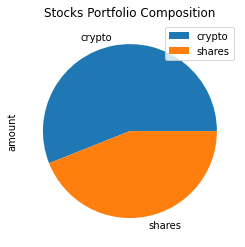

In [83]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Stocks Portfolio Composition")

In [87]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations, you have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your goal")
else:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratulations, you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [90]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["AGG","SPY"]

In [91]:
# Set Alpaca Api Key and Secret 
alpaca_api_key = ALPACA_API_KEY
alpaca_secret_key = ALPACA_SECRET_KEY

In [92]:
type(alpaca_secret_key)

str

In [93]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [94]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [95]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Drop the time component of the date
df_ticker.index = df_ticker.index.date

# Display sample data
df_ticker.head()

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0     NaN     NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0  218.33  218.90   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0  218.31  218.75   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0  218.27  218.80   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0  219.25  219.60   

                                        
               low   close      volume  
2016-08-17     NaN     NaN         NaN  
2016-08-18  218.21  218.87  42850145.0  
2016-08-19  217.74  218.57  52238224.0  
2016-08-22  217.83  218.50  48628907.0  
2016-08-23  218.90  218.94  41981207.0

In [96]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [97]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [98]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0          NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0     0.001110   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0    -0.001908   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0     0.001422   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0     0.000355   

               SPY                                                   
              open    high     low   close      volume daily_return  
2016-08-17     NaN     NaN     NaN     NaN         NaN          NaN  
2016-08-18  218.33  218.90  218.21  218.87  42850145.0          NaN  
2016-08-19  218.31  218.75  217.74  218.57  52238224.0    -0.001371  
2016-08-22  218.27  218.80  217.83  218.50  48628907.0    -0.000320  
2016-08-23  219.25  219.60  218.90  218.94  41981207.0     0.002014

In [99]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\orkhan\Desktop\python-homework\homework 4\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004693,1.006967,1.000629,1.001455,1.004886,1.005785,1.000617,0.994332,1.006293,1.006355,...,0.995416,1.002523,0.995850,1.000742,1.005276,1.003366,1.000108,1.010549,0.995437,0.990976
2,1.007493,1.006548,1.008749,1.001275,1.010376,0.999047,1.007063,0.998012,1.006910,0.999854,...,0.996500,0.998811,0.989631,0.999730,1.002924,1.005800,0.992233,1.018056,1.000262,0.985602
3,1.004250,1.001939,1.004925,1.010204,1.001860,1.001568,1.012935,0.993611,1.015650,0.997742,...,0.984619,1.000652,0.989606,1.004937,1.004238,1.013808,0.982619,1.017257,1.005186,0.989932
4,1.004394,0.999606,0.998677,1.013731,0.995680,1.007627,1.009185,0.989854,1.007250,1.008665,...,0.982567,0.997088,0.990854,1.005702,1.008738,1.010162,0.973373,1.024979,1.007276,0.993381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.256498,6.881311,3.776898,7.935460,3.911755,7.731625,4.916329,7.949116,4.338960,20.588750,...,5.580688,9.964658,4.926944,12.730146,6.277728,8.241748,5.230109,8.032031,5.945610,11.881364
7557,3.231476,6.852683,3.758655,7.929827,3.880358,7.678405,4.925431,7.889476,4.345691,20.590015,...,5.610718,10.001476,4.930464,12.742721,6.271174,8.176131,5.247508,8.068562,5.901840,11.862342
7558,3.233661,6.787270,3.773272,7.986933,3.854609,7.684614,4.900218,7.944072,4.314516,20.693362,...,5.619568,9.942333,4.949648,12.722895,6.213254,8.167888,5.254246,8.094378,5.928527,11.828493
7559,3.226117,6.789459,3.750811,7.997874,3.832089,7.692081,4.894411,7.911970,4.301824,20.669572,...,5.603306,9.886756,4.894511,12.544076,6.191229,8.152838,5.260578,8.037837,5.918006,11.895259


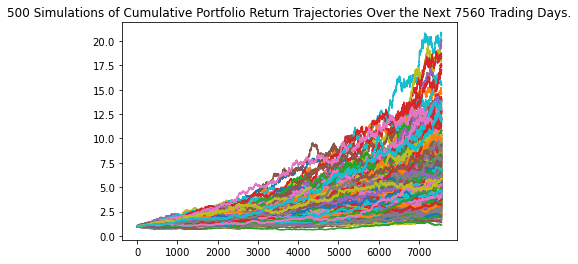

In [100]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

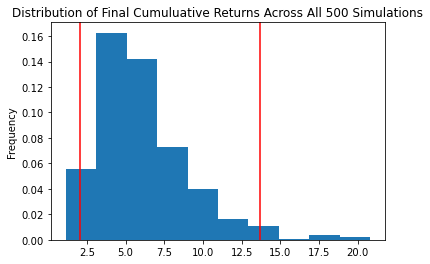

In [101]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.102899
std               3.032700
min               1.134182
25%               3.967425
50%               5.462154
75%               7.663871
max              20.811681
95% CI Lower      2.070226
95% CI Upper     13.695662
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [103]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41404.52 and $273913.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [104]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62106.78 and $410869.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_ticker, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0          NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0     0.001110   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0    -0.001908   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0     0.001422   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0     0.000355   

               SPY                                                   
              open    high     low   close      volume daily_return  
2016-08-17     NaN     NaN     NaN     NaN         NaN          NaN  
2016-08-18  218.33  218.90  218.21  218.87  42850145.0          NaN  
2016-08-19  218.31  218.75  217.74  218.57  52238224.0    -0.001371  
2016-08-22  218.27  218.80  217.83  218.50  48628907.0    -0.000320  
2016-08-23  219.25  219.60  218.90  218.94  41981207.0     0.002014

In [107]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\orkhan\Desktop\python-homework\homework 4\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002681,0.991379,0.997169,1.005445,1.008301,1.004836,1.001777,0.993426,0.990602,0.999133,...,1.009068,0.996343,1.005417,0.991671,1.006286,0.993968,1.009472,0.997213,0.997810,0.997168
2,1.018091,1.000481,0.998045,1.008918,1.013040,1.000055,1.008026,0.989327,0.987918,1.007249,...,0.997456,0.995558,1.005871,0.991864,1.006643,0.994109,1.009776,0.995322,0.990628,0.995238
3,1.014230,0.984296,0.994786,1.011072,1.011636,0.996632,1.002463,0.981826,0.981920,1.011779,...,0.997657,1.000905,1.002405,0.987340,1.009240,0.991341,1.006631,0.994377,0.987577,0.998017
4,1.010616,0.976636,1.008349,1.007464,1.014555,0.993220,1.000836,0.976708,0.977425,1.006855,...,1.001665,1.012449,1.005053,0.971272,1.003538,1.006548,1.012308,0.999434,0.999460,0.992293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.992784,1.662684,1.221413,0.971870,1.941812,1.664805,2.060456,1.355530,1.206928,1.365727,...,1.420197,2.409496,2.842787,1.131222,1.575347,1.469245,1.550298,1.035971,0.970884,1.124835
1257,1.983947,1.683749,1.232766,0.965730,1.947435,1.674974,2.076270,1.378649,1.189214,1.364007,...,1.413403,2.398603,2.835285,1.125673,1.566257,1.459640,1.550147,1.024746,0.978297,1.120394
1258,2.005597,1.685247,1.227479,0.966926,1.957544,1.680287,2.091589,1.394043,1.207341,1.377465,...,1.412179,2.443928,2.847352,1.128977,1.564439,1.445747,1.562548,1.021490,0.994456,1.117831
1259,2.016816,1.653106,1.229558,0.971267,1.956814,1.700618,2.088771,1.369553,1.211671,1.377414,...,1.427072,2.455701,2.860382,1.138431,1.572049,1.440538,1.573931,1.029677,0.992460,1.116543


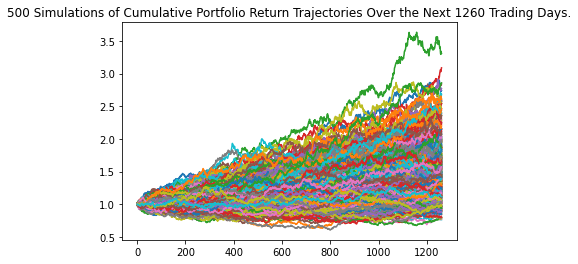

In [108]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

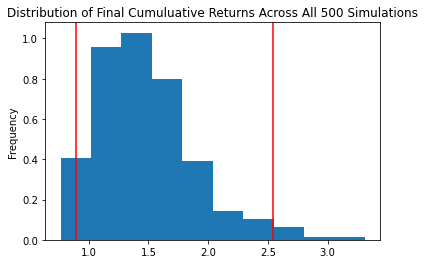

In [109]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [110]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.480005
std               0.408889
min               0.763906
25%               1.192873
50%               1.425494
75%               1.686415
max               3.312095
95% CI Lower      0.890343
95% CI Upper      2.542826
Name: 1260, dtype: float64


In [111]:
# Set initial investment
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53420.6 and $152569.53


# Ten Years Retirement Option


In [113]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_ticker, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0          NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0     0.001110   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0    -0.001908   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0     0.001422   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0     0.000355   

               SPY                                                   
              open    high     low   close      volume daily_return  
2016-08-17     NaN     NaN     NaN     NaN         NaN          NaN  
2016-08-18  218.33  218.90  218.21  218.87  42850145.0          NaN  
2016-08-19  218.31  218.75  217.74  218.57  52238224.0    -0.001371  
2016-08-22  218.27  218.80  217.83  218.50  48628907.0    -0.000320  
2016-08-23  219.25  219.60  218.90  218.94  41981207.0     0.002014

In [114]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\orkhan\Desktop\python-homework\homework 4\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990100,1.002498,1.008869,0.999542,1.005846,0.999295,0.996451,0.998373,1.013674,1.013855,...,1.001579,1.000204,0.996311,1.004985,0.999838,1.011875,0.985279,0.992123,0.987469,1.010190
2,0.995706,1.011520,1.006595,1.006728,1.012129,0.990596,0.986521,0.991122,1.018293,1.018007,...,0.999877,0.998742,1.001809,1.005765,1.005887,1.017951,1.002419,0.991676,0.988286,1.023370
3,0.999113,1.015828,1.000548,1.003648,1.017774,0.993902,0.992291,0.981897,1.020924,1.021185,...,0.992288,0.987950,0.999331,1.009117,1.011884,1.004325,1.012519,0.990309,0.997284,1.029323
4,0.993447,1.003707,0.990868,0.998887,1.011189,0.990530,1.003663,0.981906,1.014016,1.030260,...,0.998195,0.982860,0.992107,1.007496,1.020270,1.014922,1.005788,0.987017,0.990835,1.026401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.590370,2.010595,2.397791,1.867604,2.556006,1.302741,3.019268,1.290747,1.782992,2.095343,...,1.553033,2.308876,1.634574,2.640444,2.220821,2.726448,1.348611,4.033621,3.657629,2.879691
2517,1.570424,2.006653,2.373950,1.877598,2.548999,1.278518,3.013281,1.291911,1.779129,2.091202,...,1.558553,2.314950,1.625115,2.627527,2.215887,2.743193,1.342732,4.025427,3.661472,2.864204
2518,1.571098,2.030161,2.350665,1.881158,2.572030,1.273796,3.021730,1.295394,1.784648,2.076365,...,1.565879,2.335297,1.614475,2.622267,2.219841,2.741073,1.341290,4.062163,3.686884,2.857022
2519,1.574219,2.054233,2.340444,1.893329,2.594497,1.263407,2.997476,1.298878,1.791478,2.088032,...,1.540204,2.312411,1.603258,2.623526,2.194617,2.768285,1.334193,4.114113,3.626231,2.877164


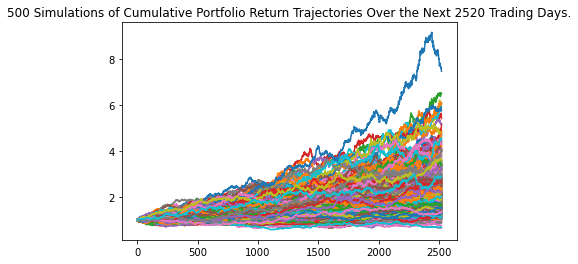

In [116]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

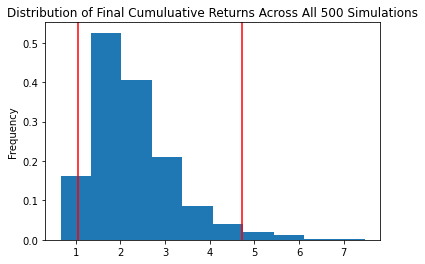

In [117]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [118]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.293639
std               0.953925
min               0.662341
25%               1.644807
50%               2.094083
75%               2.719520
max               7.470742
95% CI Lower      1.054090
95% CI Upper      4.730776
Name: 2520, dtype: float64


In [119]:
# Set initial investment
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63245.38 and $283846.54
